# Работа с базами данных

## Задачи для совместного разбора

In [1]:
import pandas as pd
import sqlite3

In [2]:
students = pd.DataFrame(
    [
        ("Сотников Евгений Янович", 1),
        ("Степанова Виктория Константиновна", 1),
        ("Горелова Вероника Яновна", 2),
        ("Гришин Иван Романович", 3),
    ],
    columns=["name", "group_id"],
)


groups = list(zip([1, 2, 3], ["ПМ20-1", "ПМ20-2", "ПМ20-3"]))

1. Создайте БД sqlite3 и таблицы Student и StudentGroup в ней.

In [3]:
students

,name,group_id
0,Сотников Евгений Янович,1
1,Степанова Виктория Константиновна,1
2,Горелова Вероника Яновна,2
3,Гришин Иван Романович,3


In [4]:
groups

[(1, 'ПМ20-1'), (2, 'ПМ20-2'), (3, 'ПМ20-3')]

In [5]:
conn = sqlite3.connect("demo.sqlite3")

In [6]:
cur = conn.cursor()

In [7]:
# cur.execute("CREATE TABLE IF NOT EXISTS Student(name TEXT, group_id INT PRIMARY KEY)")
# conn.commit()

In [8]:
cur.execute("CREATE TABLE IF NOT EXISTS StudentGroup(group_id INT PRIMARY KEY, groups TEXT)")
conn.commit()

In [9]:
# conn.close()

2. Заполните созданные таблицы данными

In [10]:
# conn = sqlite3.connect("demo.sqlite3")
# cur = conn.cursor()

In [11]:
students.to_sql("Student", conn, if_exists='replace', index=False)
# students.to_sql("Student", conn, if_exists='replace', index=False)
conn.commit()

In [12]:
cur.executemany("INSERT INTO StudentGroup (group_id, groups) VALUES(?, ?);", groups)
conn.commit()

In [12]:
# conn.close()

3. Выведите на экран фамилии студентов и номера их групп.

In [15]:
# conn = sqlite3.connect("demo.sqlite3")
# cur = conn.cursor()

In [13]:
cur.execute('''SELECT * FROM StudentGroup''')
print(cur.fetchall())

[(1, 'ПМ20-1'), (2, 'ПМ20-2'), (3, 'ПМ20-3')]


In [14]:
cur.execute('''SELECT * FROM Student''')
print(cur.fetchall())

[('Сотников Евгений Янович', 1), ('Степанова Виктория Константиновна', 1), ('Горелова Вероника Яновна', 2), ('Гришин Иван Романович', 3)]


In [15]:
sql_student = pd.read_sql('SELECT * FROM Student', conn)
sql_student

,name,group_id
0,Сотников Евгений Янович,1
1,Степанова Виктория Константиновна,1
2,Горелова Вероника Яновна,2
3,Гришин Иван Романович,3


In [17]:
cur.execute('''SELECT name, groups FROM Student
    LEFT JOIN StudentGroup ON Student.group_id=StudentGroup.group_id;''')
print(cur.fetchall())

[('Сотников Евгений Янович', 'ПМ20-1'), ('Степанова Виктория Константиновна', 'ПМ20-1'), ('Горелова Вероника Яновна', 'ПМ20-2'), ('Гришин Иван Романович', 'ПМ20-3')]


## Лабораторная работа 9

In [1]:
import json
import pickle
import sqlite3
import pandas as pd

### Создание и заполнение базы данных

1\. Создайте файл БД sqlite3 согласно рисунку ниже, на котором определен набор таблиц и связей между ними. Обратите внимание, что поля, выделенные полужирным шрифтом, обозначают первичный ключ таблицы.

Для решения задания напишите скрипт на языке SQL и исполните его при помощи метода `executescript` объекта-курсора.

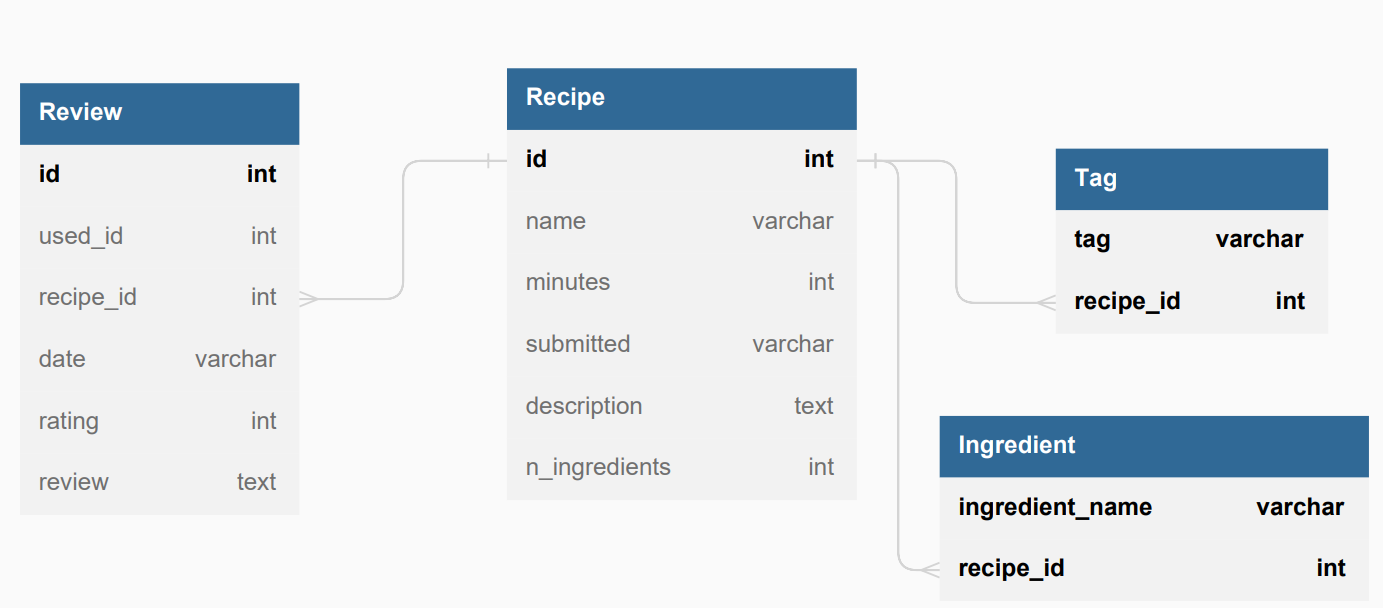

In [2]:
conn_lab_9 = sqlite3.connect("lab_recipes_9.sqlite3")
cur_lab_9 = conn_lab_9.cursor()

In [3]:
cur_lab_9.executescript("""CREATE TABLE IF NOT EXISTS Recipe(
        id INT PRIMARY KEY,
        name VARCHAR,
        minutes INT,
        submitted VARCHAR,
        description TEXT,
        n_ingredients INT
        );
                    CREATE TABLE IF NOT EXISTS Review(
        id INT PRIMARY KEY,
        user_id INT, 
        recipe_id INT,
        date VARCHAR,
        rating INT,
        review TEXT,
        FOREIGN KEY (recipe_id) REFERENCES Recipe(id)
        );
                    CREATE TABLE IF NOT EXISTS Tag(
        tag VARCHAR,
        recipe_id INT,
        PRIMARY KEY (tag, recipe_id),
        FOREIGN KEY (recipe_id) REFERENCES Recipe(id)
        );
                    CREATE TABLE IF NOT EXISTS Ingredient(
        ingredient_name VARCHAR,
        recipe_id INT,
        PRIMARY KEY (ingredient_name, recipe_id),
        FOREIGN KEY (recipe_id) REFERENCES Recipe(id)
        );
        """)
conn_lab_9 .commit()

2\. Загрузите данные из файла `recipes_sample.csv` в таблицу `Recipe`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора.

In [4]:
Recipe = pd.read_csv("recipes_sample.csv")
Recipe.drop(['contributor_id', 'n_steps'], axis=1, inplace=True)
Recipe

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


In [5]:
lst_tuples_recipe = list(zip(*map(Recipe.get, Recipe)))
lst_tuples_recipe

[('george s at the cove  black bean soup',
  44123,
  90,
  '2002-10-25',
  "an original recipe created by chef scott meskan, george's at the cove. we enjoyed this when we visited this restaurant in la jolla, california. this recipe is requested so often, they have it printed and ready at the hostess stand. it's unbeatable at the restaurant, but i do a pretty good job at home, too, if i do say so myself!",
  18.0),
 ('healthy for them  yogurt popsicles',
  67664,
  10,
  '2003-07-26',
  'my children and their friends ask for my homemade popsicles morning, noon and night. i never turn them down; who am i to tell them that they are good for them! for variety i substitute different flavours of frozen juice - grape, fruit punch, tropical etc.',
  nan),
 ('i can t believe it s spinach',
  38798,
  30,
  '2002-08-29',
  'these were so go, it surprised even me.',
  8.0),
 ('italian  gut busters',
  35173,
  45,
  '2002-07-27',
  'my sister-in-law made these for us at a family get together. th

In [6]:
cur_lab_9.executemany("INSERT OR REPLACE INTO Recipe(name, id, minutes, submitted, description, n_ingredients) VALUES(?, ?, ?, ?, ?, ?);", lst_tuples_recipe)
conn_lab_9.commit()

In [7]:
cur_lab_9.execute('SELECT * FROM Recipe')
print(cur_lab_9.fetchmany(5))

[(44123, 'george s at the cove  black bean soup', 90, '2002-10-25', "an original recipe created by chef scott meskan, george's at the cove. we enjoyed this when we visited this restaurant in la jolla, california. this recipe is requested so often, they have it printed and ready at the hostess stand. it's unbeatable at the restaurant, but i do a pretty good job at home, too, if i do say so myself!", 18), (67664, 'healthy for them  yogurt popsicles', 10, '2003-07-26', 'my children and their friends ask for my homemade popsicles morning, noon and night. i never turn them down; who am i to tell them that they are good for them! for variety i substitute different flavours of frozen juice - grape, fruit punch, tropical etc.', None), (38798, 'i can t believe it s spinach', 30, '2002-08-29', 'these were so go, it surprised even me.', 8), (35173, 'italian  gut busters', 45, '2002-07-27', 'my sister-in-law made these for us at a family get together. they are delicious!! a little messy to make bu

3\. Загрузите данные из файла `tags_sample.pickle` в таблицу `Tag`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора. Для считывания файла с данными воспользуйтесь пакетом `pickle`.

In [8]:
with open(
    "tags_sample.pickle",
    "rb"
) as fp:
    Tag_lst = pickle.load(fp)
Tag_lst

[{'id': 48,
  'tag': {'4-hours-or-less',
   'american',
   'course',
   'cuisine',
   'desserts',
   'dietary',
   'eggs-dairy',
   'equipment',
   'main-ingredient',
   'north-american',
   'oven',
   'pies',
   'pies-and-tarts',
   'preparation',
   'time-to-make',
   'weeknight'}},
 {'id': 55,
  'tag': {'3-steps-or-less',
   '4-hours-or-less',
   '5-ingredients-or-less',
   'american',
   'appetizers',
   'course',
   'cuisine',
   'dietary',
   'dips',
   'easy',
   'healthy',
   'healthy-2',
   'low-carb',
   'low-cholesterol',
   'low-in-something',
   'low-protein',
   'low-sodium',
   'mexican',
   'no-cook',
   'north-american',
   'occasion',
   'preparation',
   'southwestern-united-states',
   'technique',
   'time-to-make',
   'weeknight'}},
 {'id': 66,
  'tag': {'3-steps-or-less',
   '30-minutes-or-less',
   'american',
   'condiments-etc',
   'course',
   'cuisine',
   'dietary',
   'easy',
   'equipment',
   'free-of-something',
   'healthy',
   'healthy-2',
   'lactose

In [9]:
tag_df = pd.DataFrame(Tag_lst)
tag_df = tag_df.explode('tag')
tag_df.rename(columns={'id': 'recipe_id'}, inplace=True)
tag_df = tag_df.reindex(columns=list(tag_df.columns)[::-1])
tag_df

,tag,recipe_id
0,preparation,48
0,course,48
0,4-hours-or-less,48
0,weeknight,48
0,equipment,48
...,...,...
29983,for-large-groups,536747
29983,cakes,536747
29983,number-of-servings,536747
29983,time-to-make,536747


In [10]:
cur_lab_9.executemany("INSERT OR REPLACE INTO Tag(tag, recipe_id) VALUES(?, ?);", tag_df.values)
conn_lab_9.commit()

In [11]:
cur_lab_9.execute('SELECT * FROM Tag')
print(cur_lab_9.fetchmany(5))

[('preparation', 48), ('course', 48), ('4-hours-or-less', 48), ('weeknight', 48), ('equipment', 48)]


4\. Загрузите данные из файла `reviews_sample.csv` в таблицу `Review`. При выполнении задания воспользуйтесь методом `pd.DataFrame.to_sql`.

In [12]:
Review = pd.read_csv("reviews_sample.csv")
Review.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
Review

,id,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [ ]:
Review.to_sql("Review", conn_lab_9, if_exists='append', index=False)

In [14]:
cur_lab_9.execute('SELECT * FROM Review')
print(cur_lab_9.fetchone())

(370476, 21752, 57993, '2003-05-01', 5, "Last week whole sides of frozen salmon fillet was on sale in my local supermarket, so I bought tons (okay, only 3, but total weight was over 10 pounds).  This recipe is perfect for salmon fillet, even though it calls for salmon steaks.  I cut up the salmon into individual portions and followed the instructions exactly.  I'm on one of those food combining diets, so I left out the white wine but added just a dash of white wine vinegar instead (just a little bit, not enough to change the taste of the dish).  Super yummy, and leftovers for lunch today (lucky me)!")


5\. Загрузите данные из файла `ingredients_sample.csv` в таблицу `Ingredients`. При выполнении задания воспользуйтесь методом `DataFrame.to_sql`.

Обратите внимание, перед вызовом метода `to_sql` вам требуется привести фрейм к соответствующему таблице в БД виду.

In [15]:
Ingredients = pd.read_csv("ingredients_sample.csv")
Ingredients.rename(columns={'ingredients': 'ingredient_name', 'recipe': 'recipe_id'}, inplace=True)
Ingredients = Ingredients.reindex(columns=list(Ingredients.columns)[::-1])
Ingredients

,ingredient_name,recipe_id
0,cornstarch;milk;eggs;margarine;butter;flour;sa...,48
1,salt;tomatoes;garlic;lime juice;avocados,55
2,onion;worcestershire sauce;ketchup;garlic clov...,66
3,unsalted butter;celery;broccoli floret;oregano...,91
4,brown sugar;vanilla;all-purpose flour;egg;lemo...,94
...,...,...
29995,salt;red onion;cumin;cilantro;jalapeno;tortill...,536547
29996,unsalted butter;salt;all-purpose flour;lemon j...,536610
29997,tamari;nutritional yeast flakes;tahini sesame ...,536728
29998,avocado;blueberries;feta cheese;creole seasoni...,536729


In [16]:
Ingredients.to_sql("Ingredient", conn_lab_9, if_exists='append', index=False)

In [17]:
cur_lab_9.execute('SELECT * FROM Ingredient')
print(cur_lab_9.fetchone())

('cornstarch;milk;eggs;margarine;butter;flour;salt;baking powder;vanilla;sugar;oil;whipping cream;egg yolk;cake flour;unsweetened chocolate', 48)


### Получение данных из базы

6\. Напишите и выполните запрос на языке SQL, который считает кол-во рецептов, опубликованных в 2010 году и имеющих длину не менее 15 минут. Для выполнения запроса используйте метод `execute` объекта-курсора. Выведите искомое количество на экран.

In [33]:
res = cur_lab_9.execute('''SELECT COUNT(id)
                        FROM Recipe
                        WHERE minutes >= 15 AND submitted LIKE "2010%"''')

print(res.fetchone()[0])

1319


7\. Напишите и выполните запрос на языке SQL, который возращает id рецептов, не имеющих ни одного отзыва отзывов с рейтингом, меньше 4. Для выполнения запроса используйте функцию `pd.read_sql_query`. Выведите полученный результат на экран.

In [19]:
sql_query_1 = pd.read_sql_query('''SELECT recipe_id
                                FROM Review
                                GROUP BY Review.recipe_id
                                HAVING min(Review.rating) >= 4''', conn_lab_9)

sql_query_1

,recipe_id
0,55
1,66
2,91
3,94
4,128
...,...
20461,536360
20462,536473
20463,536547
20464,536728


8\. Создайте `pd.DataFrame`, содержащий данные из таблицы `Tag`. Создайте `pd.DataFrame`, содержащий данные из таблицы `Recipe` (для создания фреймов можно воспользоваться функцией `read_sql_query`). 

Используя механизмы группировки и объединения, которые предоставляет `pandas`, выведите на экран названия и количество тегов 5 рецептов, которые имеют наибольшее количество тэгов. Измерьте время выполнения работы вашего кода (в замеры включите время, которое тратится на загрузку таблиц).

In [20]:
%%time

Tag_df_num8 = pd.read_sql_query('SELECT * FROM Tag', conn_lab_9)
Recipe_df_num8 = pd.read_sql_query('SELECT * FROM Recipe', conn_lab_9)

merged = Recipe_df_num8[["id","name"]].merge(Tag_df_num8[["tag", "recipe_id"]], left_on='id', right_on='recipe_id')
merged.drop(labels = "recipe_id", axis = 1, inplace=True)

merged.groupby(["id", "name"])["tag"].count().sort_values(ascending=False).head(5)

Wall time: 896 ms


id     name                                  
66309  watermelon basket fruit salad             58
60942  creamsicle freeze                         56
72657  easy poached salmon with dill             53
64386  curried crab asparagus cheesy tofu dip    53
35105  fusion ketchup                            52
Name: tag, dtype: int64

9\. Используя механизмы группировки и объединения, которые предоставляет SQL, выведите на экран названия и количество тегов 5 рецептов, которые имеют наибольшее количество тэгов. При выполнении задания воспользуйтесь методом `execute` объекта-курсора. Измерьте время выполнения работы вашего кода.

Вся необходимая логика (группировки, объединения, выбор топ-5 строк) должна быть реализована на SQL, а не в виде кода на Python.

In [27]:
%%time

max_five_ex = cur_lab_9.execute('''SELECT name, COUNT(tag) as amount
                                FROM Recipe
                                INNER JOIN Tag
                                ON Recipe.id = Tag.recipe_id
                                GROUP BY Recipe.id, Recipe.name
                                ORDER BY COUNT(tag) DESC
                                LIMIT 5''')

res1 = max_five_ex.fetchall()
pd.DataFrame(res1, columns=["name", "amount"])

Wall time: 843 ms


,name,amount
0,watermelon basket fruit salad,58
1,creamsicle freeze,56
2,curried crab asparagus cheesy tofu dip,53
3,easy poached salmon with dill,53
4,fusion ketchup,52


10\. Запросите у пользователя id рецепта и верните информацию об этом рецепте. Если рецепт отсуствует, выведите соответствующее сообщение. Для подстановки значения id необходимо воспользоваться специальным синтаксисом, которые предоставляет `sqlite` для этих целей.Продемонстрируйте работоспособность вашего решения.

In [34]:
recipe_id = input("Введите id рецепта: ")

info = cur_lab_9.execute('''SELECT name
                        FROM Recipe
                        WHERE id = ?''', (recipe_id,))

result = info.fetchone()
print(result[0]) if result else print("Рецепт не найден!")

Введите id рецепта: 128
caramel apple milkshakes


In [16]:
cur_lab_9.close()
conn_lab_9.close()